# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link: https://youtu.be/xHam3ZdZOY0


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [6]:
import pandas as pd
import numpy as np

def data_parser(file_name:str) -> pd.DataFrame:
    df = pd.read_csv(file_name, index_col=0)

    # Most of exchange are NaN because the item aren't supposed to be in the market for options such as Farm Bill direct Payment rate, etc.
    # Fill futures_exchange
    
    df.loc["Corn", "futures_exchange"] = df.loc["Corn", "futures_exchange"].fillna("None")
    df.loc["Cotton", "futures_exchange"] = df.loc["Cotton", "futures_exchange"].fillna("None")
    df.loc["Soybeans", "futures_exchange"] = df.loc["Soybeans", "futures_exchange"].fillna("None")
    # For Wheat these type of wheat production are mostly traded at CBOT
    df.loc["Wheat", "futures_exchange"] = df.loc["Wheat", "futures_exchange"].fillna("CBOT")
    
    # Drop commodity_class, only Wheat production by class (item) has this attributes since others item aren't defined
    # and we can't possibly work with these since 90%+ data aren't defined

    df.drop(["commodity_class"], axis=1, inplace=True)

    # Fill marketing_year, only Futures prices daily don't have this attributes (since it can't). Also change the datatype from float64 
    # to str so all the data are compatible and remove .0 from all the str.

    df["marketing_year"] = df["marketing_year"].astype("str")
    df.loc[:, "marketing_year"] = df.loc[:, "marketing_year"].str.replace(".0", "")
    df.loc[:, "marketing_year"] = df.loc[:, "marketing_year"].fillna("None")

    # Fill calendar_year_month & futures_contract (mostly Farm bill payment rate and wheat production)
    df.loc[:, "calendar_year_month"] = df.loc[:, "calendar_year_month"].fillna("None")
    df.loc[:, "futures_contract"] = df.loc[:, "futures_contract"].fillna("None")

    # Fill data_source_date
    df.loc[:, "data_source_date"] = df.loc[:, "data_source_date"].fillna("None")

    # Fill unit for wheat contract weight ~ normally is 5000 bushels
    df["unit"] = df["unit"].fillna("5000 bushels")
    
    # Export Data
    df.to_csv("clean_dowloaded_data.csv")
    
    return df

############ Function Call ############
df = data_parser("inputdata.csv")
df

,item,futures_exchange,data_period,marketing_year,calendar_year_month,futures_contract,data_source_date,value,unit
commodity,,,,,,,,,
Corn,Basis,CBOT,Monthly,1997,1997-09,1997-12,1998-11-30,-0.145625,U.S. dollars per bushel
Corn,Basis,CBOT,Monthly,1997,1997-10,1997-12,1998-11-30,-0.251500,U.S. dollars per bushel
Corn,Basis,CBOT,Monthly,1997,1997-11,1997-12,1998-11-30,-0.241875,U.S. dollars per bushel
Corn,Basis,CBOT,Monthly,1997,1997-12,1998-03,1998-11-30,-0.205625,U.S. dollars per bushel
Corn,Basis,CBOT,Monthly,1997,1998-01,1998-03,1998-11-30,-0.144500,U.S. dollars per bushel
...,...,...,...,...,...,...,...,...,...
Wheat,Wheat production by class,CBOT,Yearly,2024,None,None,2024-06-12,208612.000000,1000 bushels
Wheat,Wheat production by class,CBOT,Yearly,2024,None,None,2024-07-12,215478.000000,1000 bushels
Wheat,Wheat production by class,CBOT,Yearly,2024,None,None,2024-08-12,223805.000000,1000 bushels


## Web Collection Requirement \#1


In [8]:
import requests
from bs4 import BeautifulSoup

def web_parser1(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.text, parser="html.parser")
    rows = soup.find_all("tr")

    # event report start at row 9 and so on, the last row is just total so we don't include it
    data = rows[9:-1]
    all_data = []
    dates = []
  
    for row in data:
        td = row.find_all("td")
        place = td[0].text.lower().title()
        event = td[6].text
        date = td[3].text
        magni = "".join(td[7].text.split(" "))

        split_date = date.split("/") #Month/Day/Year
        split_date[0], split_date[1] = split_date[1], split_date[0]
        clean_date = "/".join(split_date[::-1]) #Year/Month/Day
        
        all_data.append({
            "Place": place,
            "Event": event,
            "Magnitude": magni if magni else "None"
        })
        dates.append(clean_date)
        
    df = pd.DataFrame(all_data, index = dates)

    # Clean it 

    df.index = pd.to_datetime(df.index) # Change to datetime object for better time series analysis

    # Export
    df.to_csv("webparser1.csv")
    
    return df
############ Function Call ############
df = web_parser1("https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=ALL&beginDate_mm=02&beginDate_dd=01&beginDate_yyyy=2024&endDate_mm=02&endDate_dd=28&endDate_yyyy=2025&county=COOK%3A31&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=17%2CILLINOIS")
df

,Place,Event,Magnitude
2024-02-08,Norwood Park,Hail,1.00in.
2024-02-27,Streamwood,Tornado,EF0
2024-02-27,Elgin,Hail,1.00in.
2024-02-27,Hoffman Estates,Tornado,EF1
2024-02-27,South Barrington,Tornado,EF1
...,...,...,...
2025-02-08,Southern Cook County (Zo...,Winter Weather,None
2025-02-08,Central Cook County (Zon...,Winter Weather,None
2025-02-12,Northern Cook County (Zo...,Winter Weather,None
2025-02-18,Northern Cook County (Zo...,Cold/wind Chill,None


## Web Collection Requirement #2

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime, timezone


API_KEY = "API_KEY"
# Top U.S. Corn-Producing Regions 
LOCATIONS = ["Des Moines, Iowa","Cedar Rapids, Iowa","Chicago, Illinois","Peoria, Illinois","Lincoln, Nebraska",
             "Grand Island, Nebraska","Kansas City, Missouri","Minneapolis, Minnesota","Sioux Falls, South Dakota",]

def web_parser2(location):
    weather_data = []
    url = "http://api.weatherstack.com/current"

    for loc in location:
        params = {"access_key":API_KEY,"query": location}
        response = requests.get(url, params=params)
        data = response.json()
        
        if "current" in data:
            weather_data.append({
                "location": loc,
                "date": datetime.now(timezone.utc).date(),
                "temperature": data["current"].get("temperature"),
                "humidity": data["current"].get("humidity"),
                "wind_speed": data["current"].get("wind_speed"),
                "uv_index": data["current"].get("uv_index")
            })
        time.sleep(1) 

    return weather_data

############ Function Call ############
data = web_parser2(LOCATIONS)
df = pd.DataFrame(data)
df.to_csv("corn_weather_data.csv")
df

,location,date,temperature,humidity,wind_speed,uv_index
0,"Des Moines, Iowa",2025-07-26,26,79,20,6
1,"Cedar Rapids, Iowa",2025-07-26,26,79,20,6
2,"Chicago, Illinois",2025-07-26,26,79,20,6
3,"Peoria, Illinois",2025-07-26,26,79,20,6
4,"Lincoln, Nebraska",2025-07-26,26,79,20,6
5,"Grand Island, Nebraska",2025-07-26,26,79,20,6
6,"Kansas City, Missouri",2025-07-26,26,79,20,6
7,"Minneapolis, Minnesota",2025-07-26,26,79,20,6
8,"Sioux Falls, South Dakota",2025-07-26,26,79,20,6


## Additional Dataset Parsing/Cleaning Functions

In [12]:
import pandas as pd
import numpy as np

def extra_source1(link):
    df = pd.read_csv(link, index_col = 0)
    
    # Rename the columns
    df.rename(columns = {"PMAIZMTUSDM" : "Price"}, inplace = True)
    
    # Compute percent change (Daily return)
    df["pct_change"] = df["Price"].pct_change() * 100 
    
    # Log return
    df["log_return"] = np.log( df["Price"] / df["Price"].shift(1) )

    # Log difference transformation (Stationary purpose)
    df["price_log"] = np.log(df["Price"])
    df["price_log_diff"] = df["price_log"].diff()

    # Rolling average
    df["rolling_avg"] = df["Price"].rolling(30).mean()

    # Rolling standard deviation
    df["rolling_std"] = df["Price"].rolling(30).std()

    df.dropna(inplace = True) # We have more than enough data for visualization so droping some first price movement is fine

    # Change to date time object -> Easier to work with for time series analysis
    df.index = pd.to_datetime(df.index)

    # Ready for visualization

    df.to_csv("additional_dataset.csv")
    
    return df
    
############ Function Call ############
df = extra_source1("corn_price.csv")
df

,Price,pct_change,log_return,price_log,price_log_diff,rolling_avg,rolling_std
observation_date,,,,,,,
1992-06-01,110.201927,0.937935,0.009336,4.702314,0.009336,108.988547,5.322022
1992-07-01,102.394058,-7.085057,-0.073486,4.628829,-0.073486,108.871665,5.429597
1992-08-01,97.539932,-4.740632,-0.048567,4.580262,-0.048567,108.579857,5.795793
1992-09-01,98.216675,0.693811,0.006914,4.587176,0.006914,108.192502,6.089726
1992-10-01,94.559769,-3.723305,-0.037944,4.549232,-0.037944,107.394550,6.258780
...,...,...,...,...,...,...,...
2025-01-01,214.359927,5.684548,0.055289,5.367657,0.055289,236.352049,51.632904
2025-02-01,221.254544,3.216374,0.031657,5.399314,0.031657,233.929508,50.531420
2025-03-01,207.751691,-6.102859,-0.062970,5.336344,-0.062970,230.436360,48.490295


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. Nan values in columns like futures_exchangem unit, item (downloaded dataset): these missing values can break the analysis and aggregations. I identified them using df.isna().sum() and handled them by filling with specific values such as "None" (for most of the columns in the downloaded dataset) and "CBOT" for the column "future_exchanges" for Wheat.

2. Inconsistent date formats (Month/Day/Year vs. Year-Month-Day) (webparser1): date mismatches can prevent a consistent time-based analysis. I standardized all dates to YYYY-MM-DD and converted them to datetime objects using pd.to_datetime().

3. Blank strings in the magnitude column (webparser1): blank strings were acting like hidden NaNs, which affects calculations. I replaced empty strings with "None" as a string instead.

4. float64 year columns with .0 suffix (downloaded dataset): year values were mistakenly stored as floats, which caused formatting issues. I converted them to strings and removed the trailing .0 using .replace().

## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://www.ers.usda.gov/data-products/season-average-price-forecasts. 
*   Web Collection #1 Source: https://www.ncdc.noaa.gov/stormevents/  
*   Web Collection #2 Source: https://weatherstack.com/documentation. (Historical Weather)
*   Additional dataset: https://fred.stlouisfed.org/series/PMAIZMTUSDM. 


# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:  This project explores the impact of U.S. weather conditions on commodities futures prices. The hypothesis is that changes in weather patterns significantly influence the percent change in commodities futures. Adverse conditions such as droughts or excessive rainfall can disrupt commodities yields, creating uncertainty around supply. In response, futures prices often rise in anticipation of tighter availability. On the other hand, favorable weather that promotes healthy commodities development tends to increase expected supply, which can exert downward pressure on prices. This project will try to confirmed that this statement holds.

## Insights

In [18]:
import pandas as pd
def insight1():
    df = data_parser("inputdata.csv")
    df1 = pd.DataFrame(df[df["item"] == "Basis"].groupby(["commodity", "item", "marketing_year"])["value"].mean())
    df1.reset_index(inplace=True)
    
    corn_idx = df1[df1["commodity"] == "Corn"]["value"].idxmin()
    wheat_idx = df1[df1["commodity"] == "Wheat"]["value"].idxmin()
    soybean_idx = df1[df1["commodity"] == "Soybeans"]["value"].idxmin()
    cotton_idx = df1[df1["commodity"] == "Cotton"]["value"].idxmin()
    
    corn_df = pd.DataFrame(df1[df1["commodity"] == "Corn"].iloc[corn_idx, :]).T
    wheat_df = pd.DataFrame(df1[df1["commodity"] == "Wheat"].iloc[corn_idx, :]).T
    soybean_df = pd.DataFrame(df1[df1["commodity"] == "Soybeans"].iloc[corn_idx, :]).T
    cotton_df = pd.DataFrame(df1[df1["commodity"] == "Cotton"].iloc[corn_idx, :]).T
    
    worst_performing_year = pd.concat([corn_df, wheat_df, soybean_df, cotton_df], axis=0)
    return worst_performing_year.reset_index(drop=True)


############ Function Call ############

df = insight1()
df

,commodity,item,marketing_year,value
0,Corn,Basis,2010,-0.900156
1,Wheat,Basis,2010,-0.926281
2,Soybeans,Basis,2010,-0.993646
3,Cotton,Basis,2010,-0.642197


### Insight 1 Explanation

Insert explanation here: This insight highlights the worst-performing year by examining the "Basis" of corn futures. The basis in corn futures is defined as the difference between the spot price (the current market price) and the corresponding futures contract price. A negative basis indicates that the futures price is lower than the spot price, suggesting a potential downward movement in the future. This situation may arise due to an unexpected spike in current demand, which can push spot prices higher, a condition known as backwardation. On the other hand, a positive basis reflects a typical market scenario where futures prices are higher than spot prices due to factors like inflation, storage, and carrying costs. This market condition is referred to as contango.

We can see that the worst-performing year (for the farmer since there's a downward movement in price, thus leads to lower price level) was 2010, which, interestingly, is consistent across all commodity types. We also include the values as a reference to compare different assets and assess the level of risk involved in investing in them. Cotton appears to have a lower risk compared to the other assets, as indicated by the table.

What I learned: Using .idxmin(), .T, concat, and reset_index. These functions are not use daily so it's not easy to find a task to be able to apply it.

In [20]:
def insight2():
    df = data_parser("inputdata.csv")
    df.reset_index(inplace=True)
    price_forecasted = pd.DataFrame(df[df["item"] == "WASDE MYA price forecast"].groupby("commodity")["value"].mean())
    price_received = df[df["item"] == "Price received"].groupby("commodity")["value"].mean()

    merged = pd.merge(price_forecasted, price_received, left_index=True, right_index=True, how="inner")
    merged["Error"] =  (merged["value_y"] - merged["value_x"]) / merged["value_y"] * 100

    merged.rename(columns={"value_x":"Price Forecasted", "value_y":"Price received"}, inplace=True)

    return merged
    
############ Function Call ############
insight2()

,Price Forecasted,Price received,Error
commodity,,,
Corn,4.003786,3.787168,-5.719773
Cotton,0.671686,0.618000,-8.687112
Soybeans,9.606955,9.010975,-6.613929
Wheat,5.452469,5.294507,-2.983505


### Insight 2 Explanation

Insert explanation here: This insight evaluates the accuracy of USDA's WASDE MYA price forecasts by comparing them to the actual prices received by farmers for different commodities. It calculates the percentage error between the forecasted and actual prices to identify how close the forecasts were to real market outcomes.

A positive error means that the actual price received was higher than the forecast, suggesting the forecast underestimated the market. Conversely, a negative error indicates that the forecast overestimated prices. This can help stakeholders assess how reliable WASDE forecasts are across commodities, influencing decisions on crop planning, marketing, and risk management.

From the insights, most forecasts provided by WASDE tend to overestimate the actual values. This insight highlights the reliability of the forecasts, indicating how accurate they are within a certain percentage point. The data represents an average over the entire period, effectively capturing the average error faced by each commodity.

What I learned: Grouping, merging, column renaming, and simple error computation with vectorized operations.

In [22]:
def insight3():
    df = data_parser("inputdata.csv")
    df_basis = df[df["item"] == "Basis"]
    stats = df_basis.groupby("marketing_year")["value"].agg(["mean", "std", "min", "max"]).reset_index()
    stats = stats[(stats["std"] > 0.5)]
    stats.reset_index(inplace=True, drop=True)
    return stats

############ Function Call ############
insight3()

,marketing_year,mean,std,min,max
0,2007,-0.805220,0.779416,-3.009375,1.144375
1,2010,-0.866398,0.566340,-2.419375,1.075000
2,2012,-0.073486,0.546017,-2.409375,1.505000


### Insight 3 Explanation

Insert explanation here: This insight summarizes the year-to-year volatility and trend in the basis values for agricultural commodities by calculating mean, standard deviation, minimum, and maximum for each marketing year. The basis, defined as the difference between the spot price and the futures price, is an important indicator of market conditions, transportation costs, and local supply-demand dynamics.

By analyzing these summary statistics over time, we can assess whether the basis has become more volatile (using standard deviation), whether there's a trend toward weakening or strengthening basis (via mean), and identify any outlier years (using min/max) that may have been driven by unusual market conditions such as weather shocks or policy changes.

Filtering for years with a standard deviation greater than 0.5 highlights periods of higher volatility, helping to identify years with significant market uncertainty or unusual disruptions. From the table, 2007, 2010, and 2012 are the top three most volatile marketing years based on their standard deviations. A notable byproduct of this observation is that the means for these years are all negative, indicating poor performance during these periods. This combination of high volatility and low prices reflects particularly unfavorable market conditions.

What I learned: Using groupby with multiple function (.agg() follows by a list of aggregation functions to compute multiple statistics all at once).

In [24]:
def insight4():
    weather_df= web_parser1("https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=ALL&beginDate_mm=02&beginDate_dd=01&beginDate_yyyy=2024&endDate_mm=02&endDate_dd=28&endDate_yyyy=2025&county=COOK%3A31&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=17%2CILLINOIS")
    corn_df = extra_source1("corn_price.csv")
    weather_df.index = weather_df.index.strftime("%Y-%m")
    corn_df.index = corn_df.index.strftime("%Y-%m")

    # Compute Volatility
    corn_df["volatility"] = corn_df["log_return"].rolling(12).std()

    # Count the number of events 
    grouped = pd.DataFrame(weather_df.groupby(weather_df.index)["Event"].count())
    merged = pd.merge(corn_df, grouped, left_index = True, right_index = True, how="inner")
    correlation = merged["Event"].corr(merged["volatility"])

    return f"Correlation: {correlation}, How much does the number of events and volatility correlates: {round(correlation * 100, 2)}%"

############ Function Call ############
insight4()

'Correlation: 0.4537348518138657, How much does the number of events and volatility correlates: 45.37%'

### Insight 4 Explanation

Insert explanation here: Compute the correlation between the number of events from 2024 to 2025 and the volatility of corn prices. This insight explains the degree to which our data depends on each other. In short, the correlation tells us how strongly the variables are related. A correlation of 1 is the maximum correlation, meaning that both the dataset fully correlate with each other (a linear correlation). The correlation indicates that as one variable increases, the other one tends to increase as well (for positive correlation). For a correlation of 0, the variables are not correlated at all. 

Based on this information, we can conclude that volatility is somewhat correlated with the number of events (~0.5). Therefore, we may reasonably rely on the number of events as an indicator when analyzing changes in volatility. However, we must also keep in mind that correlation does not imply causation. For example, ice cream sales and drowning rates are correlated, but one does not cause the other. Both tend to spike during the summer, when people are more likely to consume ice cream and engage in water-related activities.

What I learned: Using statistical function like .corr() to compute the correlation and rolling().std() to compute the volatility. 

In [184]:
def insight5():
    df = web_parser1("https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=ALL&beginDate_mm=02&beginDate_dd=01&beginDate_yyyy=2024&endDate_mm=02&endDate_dd=28&endDate_yyyy=2025&county=COOK%3A31&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=17%2CILLINOIS")
    df.index = df.index.strftime("%Y")
    df = pd.DataFrame(df.groupby(["Event", df.index])["Event"].count())
    df.rename(columns={"Event":"Count"}, inplace=True)

    df["Total"] = df.groupby(level=1)["Count"].transform("sum")
    df["Percent"] = df["Count"] / df["Total"] * 100

    # Rank each event 
    df["Rank"] = df.groupby(level=1)["Count"].rank(ascending=False)
    df["Rank"] = df["Rank"].astype(int)
    return df
############ Function Call ############
insight5()

Count  Total    Percent  Rank
Event                                                
Cold/wind Chill   2025      2     13  15.384615     3
Drought           2024      2    197   1.015228    10
Flash Flood       2024      4    197   2.030457     7
Flood             2024     18    197   9.137056     3
                  2025      5     13  38.461538     2
Hail              2024     35    197  17.766497     2
Heavy Rain        2024      4    197   2.030457     7
High Wind         2024      9    197   4.568528     5
Rip Current       2024      4    197   2.030457     7
Seiche            2024      2    197   1.015228    10
Strong Wind       2024      1    197   0.507614    12
Thunderstorm Wind 2024     99    197  50.253807     1
Tornado           2024     17    197   8.629442     4
Winter Weather    2024      2    197   1.015228    10
                  2025      6     13  46.153846     1

### Insight 5 Explanation

Insert explanation here: From February 2024 through February 2025 in Cook County, convective storm events especially thunderstorm wind, hail, and flooding dominated over 75% of all recorded weather incidents during the corn‐growing season, while winter hazards start to increase in early 2025. 

This tells us that, for our analysis of corn‐price volatility, the primary short‑term risk drivers are summer‑season, high‑intensity convective storms rather than drought or winter cold. Recognizing which weather threats concentrate most heavily and when would allows market analysts and risk managers to target their hedging and insurance strategies far more effectively, allocating resources to the hazards that truly move the needle on supply disruptions and price swings.

What I learned: How to use .rank(), .transform() and grouping by level in DataFrame (See more in Groupby Documentation)

## Data Visualizations

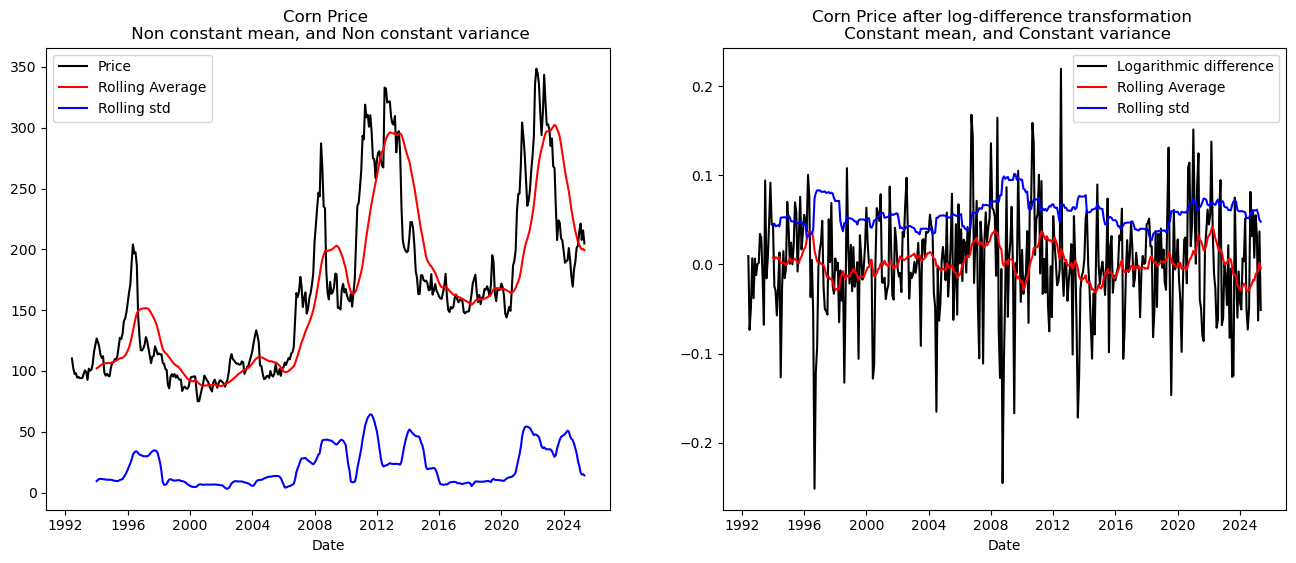

<Figure size 2200x1000 with 0 Axes>

In [87]:
import matplotlib.pyplot as plt
df = extra_source1("corn_price.csv")

def visual1():
    figure, axis = plt.subplots(1, 2, figsize = (16,6), sharex=True, dpi=100)

    X = df.index
    
    axis[0].plot(X, df["Price"], color="black", label="Price")
    axis[0].plot(X, df["Price"].rolling(20).mean(), color="red", label="Rolling Average")
    axis[0].plot(X, df["Price"].rolling(20).std(), color="blue", label="Rolling std")
    axis[0].set_title("Corn Price \n Non constant mean, and Non constant variance")
    axis[0].set_xlabel("Date")
    axis[0].legend()

    axis[1].plot(X, df["price_log_diff"], color="black", label="Logarithmic difference")
    axis[1].plot(X, df["price_log_diff"].rolling(20).mean(), color="red", label="Rolling Average")
    axis[1].plot(X, df["price_log_diff"].rolling(20).std(), color="blue", label="Rolling std")
    axis[1].set_title("Corn Price after log-difference transformation \n Constant mean, and Constant variance")
    axis[1].set_xlabel("Date")
    axis[1].legend()
    plt.figure(figsize=(22,10))
    plt.show()

############ Function Call ############
visual1()

### Visualization 1 Explanation

Insert explanation here: The graph on the left shows that corn prices fluctuate significantly over time, with no consistent mean or variance. This behavior indicates that the raw price data is non-stationary, meaning statistical properties like mean and variance change over time. 

Conclusion: the dataset is influenced by long-term trends, seasonality, and possibly external shocks (e.g. weather, policy, demand changes).

The graph on the right, which shows the log-differenced prices along with the rolling average and rolling standard deviation, illustrates a more stable pattern. Both the rolling mean and standard deviation remain relatively constant over time, suggesting that the transformed data is stationary. 

Conclusion: The data has a constant mean and variance, making it suitable for many statistical modeling techniques, such as time series forecasting using ARIMA.

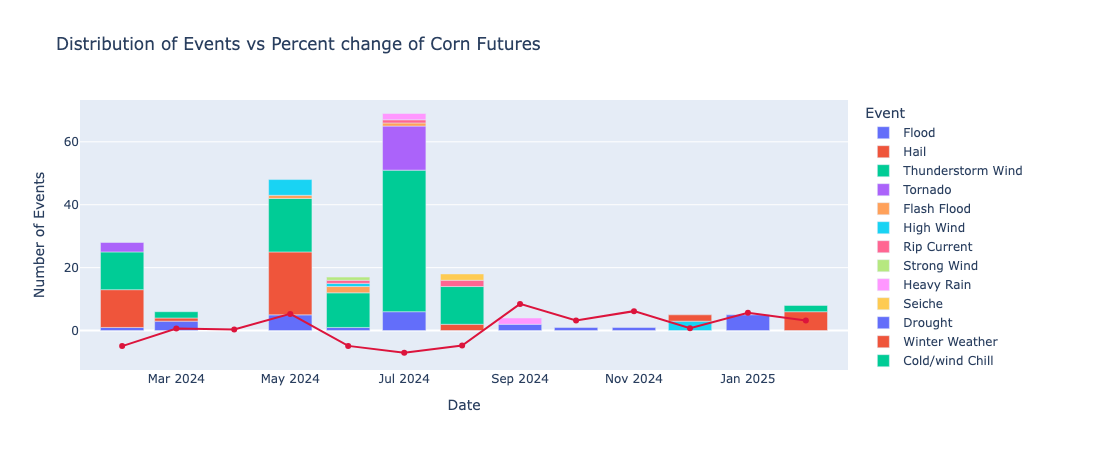

In [143]:
import plotly.express as px
import plotly.graph_objects as go
df1 = web_parser1("https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=ALL&beginDate_mm=02&beginDate_dd=01&beginDate_yyyy=2024&endDate_mm=02&endDate_dd=28&endDate_yyyy=2025&county=COOK%3A31&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=17%2CILLINOIS")
df2 = extra_source1("corn_price.csv")

def visual2():
    df1.index = df1.index.strftime("%Y-%m")
    df2.index = df2.index.strftime("%Y-%m")
    df = pd.merge(df1, df2, left_index = True, right_index = True, how="inner")
    
    grouped = pd.DataFrame(df.groupby([df.index, "Event"])["Event"].count())
    grouped.rename(columns={"Event": "Count"}, inplace=True)
    grouped.reset_index(inplace=True)
    grouped.rename(columns={"level_0": "Date"}, inplace=True)

    fig = px.bar(grouped, x="Date", y="Count", color="Event", labels={"Date": "Date",
                       "Event": "Event", "Count":"Number of events"}, title = "Distribution of Events vs Percent change of Corn Futures")
    fig.update_layout(yaxis_title='Number of Events',height=450,width=1050)

    fig.add_trace(
    go.Scatter(
        x=df2.loc[df1.index[0]: df1.index[-1]].index,
        y=df2.loc[df1.index[0]: df1.index[-1]]["pct_change"],
        line_color="crimson",
        name="Percent Change for Corn Futures"
    ))

    fig.show()

############ Function Call ############
visual2()

### Visualization 2 Explanation

Insert explanation here: The distribution of events versus the percent change in corn futures visualizes how corn futures prices change with respect to the number of events occurring during those months. The events are based solely on data from Cook County, Illinois (where Chicago is located). Despite this, Illinois is the second-largest state in terms of corn production. We are examining how these types of events could affect corn-growing potential in the region.

Conclusion: From the graph, we can observe various events that may influence prices to rise or fall. Based on the results, we can infer that a higher number of events tends to lead to a downward movement in prices. Specifically, from May 2024 to September 2024, we see a noticeable decline, during which numerous natural events occurred, and the percent change in corn futures prices also dropped. This also align with our insight 5 that provide a table based for Number of Events happening in each year. 

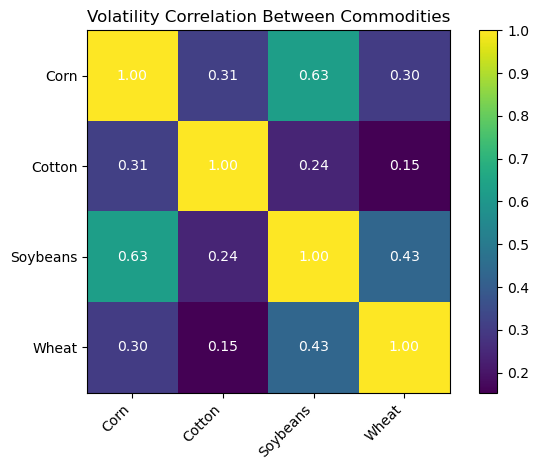

In [91]:
import matplotlib.pyplot as plt

def visual3():
    df = data_parser("inputdata.csv")
    commodities = ["Corn", "Cotton", "Soybeans", "Wheat"]
    new_df = {}

    for commodity in commodities:
        # filter each commodity
        sub_df = df[(df["item"] == "Basis") & (df.index == commodity)].copy()
        sub_df.reset_index(inplace=True)
        sub_df.index = pd.to_datetime(sub_df["data_source_date"])
        sub_df["volatility"] = sub_df["value"].rolling(window=12).std()
        new_df[commodity] = sub_df
        
    correlation_list = []

    for commodity in commodities:
        for next_commodity in commodities:
            auto_corr = new_df[commodity]["volatility"].corr(new_df[next_commodity]["volatility"])
            correlation_list.append(auto_corr)

    array = np.array(correlation_list).reshape((4,4))

    fig, ax = plt.subplots()
    im = ax.imshow(array, cmap="viridis")
    
    ax.set_xticks(np.arange(len(commodities)))
    ax.set_yticks(np.arange(len(commodities)))
    ax.set_xticklabels(commodities, rotation=45, ha="right")
    ax.set_yticklabels(commodities)
    
    for i in range(len(commodities)):
        for j in range(len(commodities)):
            text = ax.text(j, i, f"{array[i, j]:.2f}",
                           ha="center", va="center", color="white")
    
    ax.set_title("Volatility Correlation Between Commodities")
    fig.tight_layout()
    plt.colorbar(im, ax=ax)
    plt.show()

############ Function Call ############
visual3()

### Visualization 3 Explanation

Insert explanation here: This insight visualizes the correlation of price volatility in the basis values across four major commodities: Corn, Cotton, Soybeans, and Wheat. The basis for each commodity is smoothed using a 12-month rolling standard deviation to quantify its volatility over time. The result is a heatmap that reveals how closely the volatilities of these markets move together.

High correlation values (near 1.0) between commodities suggest they tend to experience similar market shocks or follow shared economic patterns—such as common growing seasons, global demand cycles, or overlapping export markets. Low or negative correlations may indicate that the commodities respond differently to supply chain changes or policy decisions, allowing for diversification in trading or hedging strategies.

Conclusion: From the graph, Soybeans and Corn have a correlation of 0.63, which is more than 50%. The second-highest correlation is between Wheat and Soybeans, with a value of 0.43. These results suggest potential hedging opportunities for Corn and Soybeans, as they tend to move together more closely than other commodities.

This visual makes it easier for analysts and traders to spot interconnected risks or diversification opportunities across crop markets.

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*  Heatmap Documentation: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
*  Groupby Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
